# Converting mapplotblog routines to pandex

This notebook re-implements the warming stripes blog by Maximilian Nöthe:

https://matplotlib.org/matplotblog/posts/warming-stripes/

into a `pandex` extension that can be loaded directly from GitHub


## pandex implementation

The following will download the `heat_stripes` extension located in a public GitHub repo:


In [1]:
import pandex as pd
pd.ext.import_extension('github:connectedblue/pdext_collection -> heat_stripes')

In [9]:
# cut and paste data from
# https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt
# and store in a local file (pandas unable to read directly from the url)
df = pd.read_fwf(
    'HadCRUT.4.6.0.0.annual_ns_avg.txt',
    index_col=0,
    usecols=(0, 1),
    names=['year', 'anomaly'],
    header=None,
)



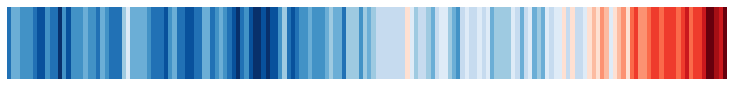

In [10]:
fig = df.ext.heat_stripes('anomaly', clim=0.7, reference='1971:2000')

In [3]:
# getting help
help(pd.DataFrame().ext.heat_stripes)

Help on function heat_stripes in module 6efd873b4a3e25b3649207ab457441b86b882f46.matplotblog.warm_stripes:

heat_stripes(df, col, reference=None, clim=None, first=None, last=None, index=None, cmap=None)
        Creates a stripped heatmap.
        Inspired by Maximilian Nöthe -- https://matplotlib.org/matplotblog/posts/warming-stripes/
    
        Input:
            col -- the name of the column to be heatstriped.  Must be
                   numeric and missing values are dropped
            reference -- A string of the form 'A:B' that identifies the index
                         rows where the colour pallette should be centered.
                         If None, the row in the middle of col is used
            clim  -- a numeric value +/- the reference value that controls 
                     the colour limit of the stripes.  Default is 2 standard
                     deviations of the values in col
            first -- First index row to use in stripes.  If None, then first row
   

## Testing alternate parameter values

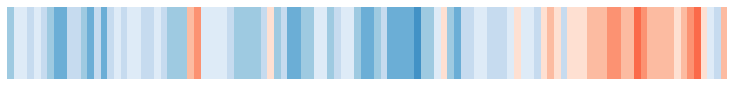

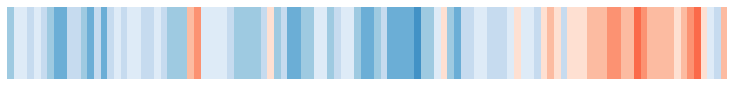

In [4]:
df = pd.read_fwf(
    'HadCRUT.4.6.0.0.annual_ns_avg.txt',
    index_col=2,
    usecols=(0, 1, 2),
    names=['year', 'anomaly', 'idx'],
    header=None,
)
df.ext.heat_stripes('anomaly', clim=0.7, first=1905, last=2012, index='year')

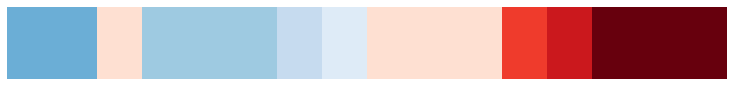

In [5]:

df = pd.DataFrame({'values': [2,2,5,3,3,3,4,4.5,4.75,5,5.1, 8,9,10,10,10]})
fig = df.ext.heat_stripes('values')

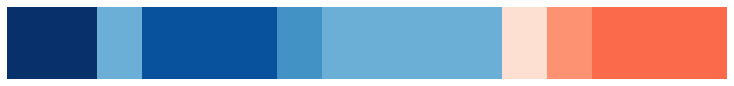

In [6]:
fig = df.ext.heat_stripes('values', reference = '10:12')

# This is the logic from the blog

The code from the blog is reproduced below


In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

In [ ]:
FIRST = 1850
LAST = 2018  # inclusive

# Reference period for the center of the color scale
FIRST_REFERENCE = 1971
LAST_REFERENCE = 2000
LIM = 0.6 # degrees

In [ ]:
anomaly = df.loc[:,'anomaly'].dropna()
reference = anomaly.loc[FIRST_REFERENCE:LAST_REFERENCE].mean()

In [ ]:
len(anomaly)//2

In [ ]:
anomaly.index[-1]

In [ ]:
anomaly.std()

In [ ]:
# the colors in this colormap come from http://colorbrewer2.org
# the 8 more saturated colors from the 9 blues / 9 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

In [ ]:
fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

In [ ]:
# create a collection with a rectangle for each year
col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(FIRST, LAST + 1)
])

# set data, colormap and color limits
col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)

In [ ]:
ax.set_ylim(0, 1)
ax.set_xlim(FIRST, LAST + 1)

In [ ]:
fig

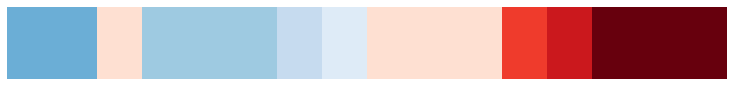

In [11]:
df = pd.DataFrame({'values': [2,2,5,3,3,3,4,4.5,4.75,5,5.1, 8,9,10,10,10]})
fig = df.ext.heat_stripes('values')